1) кластеризовать изображение

In [1]:
import seaborn as sns
from scipy import ndimage, misc
from numpy.random import choice
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from matplotlib.colors import ListedColormap

In [2]:
def create_data(im):
    im_loaded = im.load()
    return [(x, y, im_loaded[x, y][0], im_loaded[x, y][1], im_loaded[x, y][2]) for x in range(im.size[0]) for y in range(im.size[1])]

2) удобно задать объект для поиска

In [3]:
def find_box_cluster(db):
    number = -1
    for center in db.cluster_centers_:
        number += 1
        if center[2] > 220 and center[2] < 260:
            if center[3] > 200 and center[3] < 240:
                if center[4] > 170 and center[4] < 210:
                    return number

In [4]:
def get_gray(image_loaded, p):
    return (int((sum(image_loaded[p[0], p[1]]) - 255) / 3),
            int((sum(image_loaded[p[0], p[1]]) - 255) / 3),
            int((sum(image_loaded[p[0], p[1]]) - 255) / 3))

In [5]:
original = Image.open("Darkorbit.PNG")
image = original.copy()

In [6]:
%%time
# кластеризация
image_loaded = image.load()
db = KMeans(n_clusters = 10)
data = create_data(image)
db_clusters = db.fit_predict(data)

Wall time: 1.93 s


In [7]:
# получение изображения для демонстрации кластеризации
clustered = original.copy()
clustered_loaded = clustered.load()
for p, c in zip(data, db_clusters):
    clustered_loaded[p[0], p[1]] = (int(db.cluster_centers_[c, 2]),
                                    int(db.cluster_centers_[c, 3]),
                                    int(db.cluster_centers_[c, 4]))

3) заданный объект нужно оставить цветным, остальное изображение сделать оттенками серого

In [8]:
def make_gray(image, image_loaded, db, db_clusters):
    data = create_data(image)
    center_number = find_box_cluster(db)
    for p, c in zip(data, db_clusters):
        if center_number != c:
            image_loaded[p[0], p[1]] = get_gray(image_loaded, p)

In [9]:
# раскрашивание в серый тон
make_gray(image, image_loaded, db, db_clusters)

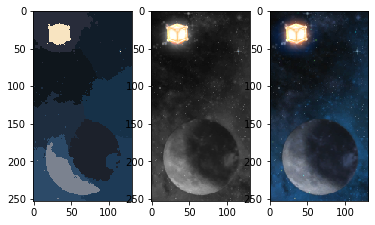

In [10]:
_, axes = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = (12, 9)

axes[0].imshow(clustered)
axes[1].imshow(image)
axes[2].imshow(original)

4) Кластеризовать новое изображение, обнаружить на нём заданный объект

In [11]:
%%time
# кластеризация
new_1_original = Image.open("Darkorbit_new_1.PNG")
new_1_image = new_1_original.copy()
new_1_image_loaded = new_1_image.load()
new_1_db = KMeans(n_clusters = 10)
new_1_data = create_data(new_1_image)
new_1_db_clusters = new_1_db.fit_predict(new_1_data)

Wall time: 5.1 s


In [12]:
# получение изображения для демонстрации кластеризации
new_1_clustered = new_1_image.copy()
new_1_clustered_loaded = new_1_clustered.load()
for p, c in zip(new_1_data, new_1_db_clusters):
    new_1_clustered_loaded[p[0], p[1]] = (int(new_1_db.cluster_centers_[c, 2]),
                                          int(new_1_db.cluster_centers_[c, 3]),
                                          int(new_1_db.cluster_centers_[c, 4]))

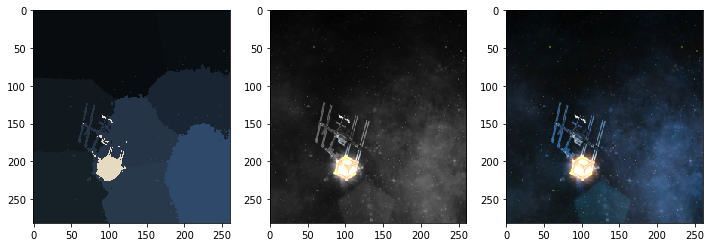

In [13]:
make_gray(new_1_image, new_1_image_loaded, new_1_db, new_1_db_clusters)
_, axes = plt.subplots(1, 3)

axes[0].imshow(new_1_clustered)
axes[1].imshow(new_1_image)
axes[2].imshow(new_1_original)

4) Кластеризовать новое изображение, обнаружить на нём заданный объект

In [14]:
%%time
# кластеризация
new_2_original = Image.open("Darkorbit_new_2.PNG")
new_2_image = new_2_original.copy()
new_2_image_loaded = new_2_image.load()
new_2_db = KMeans(n_clusters = 10)
new_2_data = create_data(new_2_image)
new_2_db_clusters = new_2_db.fit_predict(new_2_data)

Wall time: 2.82 s


In [15]:
# получение изображения для демонстрации кластеризации
new_2_clustered = new_2_image.copy()
new_2_clustered_loaded = new_2_clustered.load()
for p, c in zip(new_2_data, new_2_db_clusters):
    new_2_clustered_loaded[p[0], p[1]] = (int(new_2_db.cluster_centers_[c, 2]),
                                          int(new_2_db.cluster_centers_[c, 3]),
                                          int(new_2_db.cluster_centers_[c, 4]))

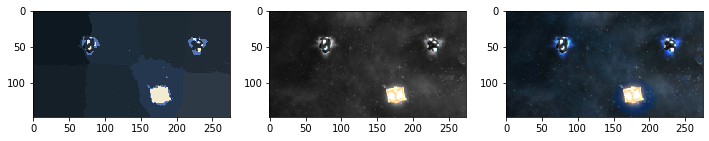

In [16]:
make_gray(new_2_image, new_2_image_loaded, new_2_db, new_2_db_clusters)
_, axes = plt.subplots(1, 3)

axes[0].imshow(new_2_clustered)
axes[1].imshow(new_2_image)
axes[2].imshow(new_2_original)

5) оформить всё в виде работоспособной программы